In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import warnings

sns.set_theme(style="darkgrid", font_scale=1.2)
plt.rcParams['figure.figsize'] = (20.0, 10.0)
warnings.filterwarnings('ignore')

In [2]:
lockdown = pd.read_csv("lockdown_us.csv")
lockdown.head(10)

,Country,State,County,Date,Type
0,United States,Alabama,NaN,2020-04-04,Stay at home
1,United States,Alabama,Birmingham,2020-03-24,Shelter in place
2,United States,Alaska,NaN,2020-03-28,Stay at home
3,United States,Arizona,NaN,2020-03-31,Stay at home
4,United States,California,NaN,2020-03-19,Stay at home
5,United States,Colorado,NaN,2020-03-26,Stay at home
6,United States,Connecticut,NaN,2020-03-23,Stay at home
7,United States,Delaware,NaN,2020-03-24,Shelter in place
8,United States,District of Columbia,NaN,2020-04-01,Stay at home
9,United States,Florida,NaN,2020-04-03,Stay at home


In [3]:
# Cleaning the lockdown dates dataset.

lockdown_c = lockdown[lockdown['County'].isnull()].drop(columns=['Country','County'])
lockdown_c = lockdown_c[lockdown_c["State"] != "Puerto Rico"]
lockdown_c = lockdown_c.rename(columns={"State": "state", "Date": "lockdown_start", "Type": "lockdown_type"}).replace({'Stay at home': 0, 'Shelter in place': 1})

lockdown_c["lockdown_end"] = ["2020-04-30", "2020-04-24", "2020-05-15", "2021-06-15", "2020-04-27", "2020-05-20", "2020-05-15", 
                              "2020-05-15", "2020-05-04", "2020-04-24", "2020-05-31", "2020-04-30", "2020-05-30", "2020-05-01", 
                              "2020-05-03", "2020-06-29", "2020-05-14", "2020-05-31", "2020-05-15", "2020-05-18", "2020-06-05", 
                              "2020-05-04", "2020-05-11", "2020-05-03", "2020-04-24", "2020-05-15", "2020-06-15", "2020-06-09", 
                              "2020-05-15", "2020-05-15", "2020-05-08", "2020-05-29", "2020-06-19", "2020-05-08", "2020-05-08", 
                              "2020-05-04", "2020-04-30", "2020-05-01", "2020-05-15", "2020-06-10", "2020-05-31", "2020-05-04", "2020-05-26"]

lockdown_c = lockdown_c[["state", "lockdown_start", "lockdown_end", "lockdown_type"]]

lockdown_c["lockdown_start"] = pd.to_datetime(lockdown_c["lockdown_start"], format='%Y-%m-%d')
lockdown_c["lockdown_end"] = pd.to_datetime(lockdown_c["lockdown_end"], format='%Y-%m-%d')
lockdown_c["lockdown_duration"] = (lockdown_c["lockdown_end"] - lockdown_c["lockdown_start"]).dt.days

lockdown_c = lockdown_c.sort_values(by="lockdown_duration", ascending=False)
lockdown_c.head(10)

,state,lockdown_start,lockdown_end,lockdown_type,lockdown_duration
4,California,2020-03-19,2021-06-15,0,453
44,Kentucky,2020-03-26,2020-06-29,0,95
88,Oregon,2020-03-23,2020-06-19,0,88
74,New Jersey,2020-03-21,2020-06-09,0,80
73,New Hampshire,2020-03-28,2020-06-15,0,79
50,Michigan,2020-03-24,2020-06-05,0,73
168,Virginia,2020-03-30,2020-06-10,0,72
41,Illinois,2020-03-21,2020-05-30,0,70
169,Washington,2020-03-23,2020-05-31,0,69
39,Hawaii,2020-03-25,2020-05-31,0,67


States Chosen: California, Kentucky, New Jersey, New Hampshire, Washington, Georgia, South Carolina, Alabama, Florida, Texas

In [4]:
states_of_interest = ["California", "Kentucky", "Washington", "New Jersey", "New Hampshire", "Georgia", "South Carolina", "Alabama", "Florida", "Texas"]

lockdown_j = lockdown_c[lockdown_c["state"].isin(states_of_interest)]
lockdown_j

,state,lockdown_start,lockdown_end,lockdown_type,lockdown_duration
4,California,2020-03-19,2021-06-15,0,453
44,Kentucky,2020-03-26,2020-06-29,0,95
74,New Jersey,2020-03-21,2020-06-09,0,80
73,New Hampshire,2020-03-28,2020-06-15,0,79
169,Washington,2020-03-23,2020-05-31,0,69
9,Florida,2020-04-03,2020-05-04,0,31
126,Texas,2020-04-02,2020-05-01,0,29
118,South Carolina,2020-04-07,2020-05-04,0,27
0,Alabama,2020-04-04,2020-04-30,0,26
21,Georgia,2020-04-03,2020-04-24,1,21


In [5]:
flights = pd.read_csv("jantojun2020.csv")
flights.head(10)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,TAIL_NUM,ORIGIN,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2020,1,1,1,3,1/1/2020,WN,5888,N951WN,ONT,...,95.0,122.0,74.0,363,2,8.0,0.0,27.0,0.0,33.0
1,2020,1,1,1,3,1/1/2020,WN,6276,N467WN,ONT,...,90.0,92.0,71.0,363,2,NaN,NaN,NaN,NaN,NaN
2,2020,1,1,1,3,1/1/2020,WN,4598,N7885A,ONT,...,70.0,68.0,57.0,333,2,NaN,NaN,NaN,NaN,NaN
3,2020,1,1,1,3,1/1/2020,WN,4761,N551WN,ONT,...,75.0,75.0,63.0,333,2,NaN,NaN,NaN,NaN,NaN
4,2020,1,1,1,3,1/1/2020,WN,5162,N968WN,ONT,...,80.0,67.0,57.0,333,2,NaN,NaN,NaN,NaN,NaN
5,2020,1,1,1,3,1/1/2020,WN,5684,N7856A,ONT,...,75.0,80.0,57.0,333,2,NaN,NaN,NaN,NaN,NaN
6,2020,1,1,1,3,1/1/2020,WN,6152,N7735A,ONT,...,80.0,72.0,62.0,333,2,NaN,NaN,NaN,NaN,NaN
7,2020,1,1,1,3,1/1/2020,WN,1679,N405WN,ONT,...,85.0,73.0,66.0,390,2,0.0,0.0,0.0,7.0,40.0
8,2020,1,1,1,3,1/1/2020,WN,3479,N489WN,ONT,...,85.0,100.0,73.0,390,2,NaN,NaN,NaN,NaN,NaN
9,2020,1,1,1,3,1/1/2020,WN,4069,N7708E,ONT,...,80.0,84.0,71.0,390,2,NaN,NaN,NaN,NaN,NaN


In [6]:
# Cleaning the flight delays dataset.

airports_of_interest = ["LAX", "CVG", "SEA", "EWR", "MHT", "ATL", "GSP", "BHM", "MCO", "DFW"]
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun"]

flights_c = flights[["ORIGIN_STATE_NM", "ORIGIN", "DEST_STATE_NM", "DEST", "FL_DATE", "MONTH", "DISTANCE", "CANCELLED", "DEP_DELAY_NEW"]]
flights_c = flights_c.rename(columns={"ORIGIN_STATE_NM": "orig_state", "ORIGIN": "orig_airport", "DEST_STATE_NM": "dest_state", 
                                      "DEST": "dest_airport", "FL_DATE": "flight_date", "MONTH": "flight_month", 
                                      "DISTANCE": "distance", "CANCELLED": "cancelled", "DEP_DELAY_NEW": "dep_delay"})

flights_c["cancelled"] = flights_c["cancelled"].astype(bool)
flights_c["flight_date"] = pd.to_datetime(flights_c["flight_date"], format='%m/%d/%Y')
flights_c["flight_month"] = flights_c["flight_month"].replace({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun"})
flights_c["flight_month"] = pd.Categorical(flights_c["flight_month"], categories=months, ordered=True)

flights_c

,orig_state,orig_airport,dest_state,dest_airport,flight_date,flight_month,distance,cancelled,dep_delay
0,California,ONT,California,SFO,2020-01-01,Jan,363,False,41.0
1,California,ONT,California,SFO,2020-01-01,Jan,363,False,0.0
2,California,ONT,California,SJC,2020-01-01,Jan,333,False,0.0
3,California,ONT,California,SJC,2020-01-01,Jan,333,False,10.0
4,California,ONT,California,SJC,2020-01-01,Jan,333,False,1.0
...,...,...,...,...,...,...,...,...,...
2745842,Washington,SEA,Hawaii,HNL,2020-06-13,Jun,2677,False,0.0
2745843,Arizona,PHX,Washington,SEA,2020-06-13,Jun,1107,False,0.0
2745844,Washington,SEA,Arizona,PHX,2020-06-13,Jun,1107,False,0.0
2745845,California,SNA,Washington,SEA,2020-06-13,Jun,978,False,0.0


In the merged datasets below, I've added a new `lockdown_flight` variable that represents whether a flight was scheduled during a lockdown order or not. This variable accounts for the each state's unique lockdown duration, so there shouldn't be issues with its accuracy.

In [7]:
# Merged dataset w/ lockdown dataset focusing on the flights that departed from the states of interest.

flights_orig = flights_c[flights_c["orig_state"].isin(states_of_interest)]
#flights_orig = flights_orig[flights_orig["orig_airport"].isin(airports_of_interest)]

flights_orig_m = flights_orig.merge(lockdown_c, left_on="orig_state", right_on="state", how="left")
flights_orig_m = flights_orig_m.drop(columns=["dest_state", "dest_airport", "state"])

flights_orig_m["lockdown_flight"] = ((flights_orig_m["lockdown_start"] < flights_orig_m["flight_date"]) & (flights_orig_m["lockdown_end"] > flights_orig_m["flight_date"]))

flights_orig_m.head()

,orig_state,orig_airport,flight_date,flight_month,distance,cancelled,dep_delay,lockdown_start,lockdown_end,lockdown_type,lockdown_duration,lockdown_flight
0,California,ONT,2020-01-01,Jan,363,False,41.0,2020-03-19,2021-06-15,0,453,False
1,California,ONT,2020-01-01,Jan,363,False,0.0,2020-03-19,2021-06-15,0,453,False
2,California,ONT,2020-01-01,Jan,333,False,0.0,2020-03-19,2021-06-15,0,453,False
3,California,ONT,2020-01-01,Jan,333,False,10.0,2020-03-19,2021-06-15,0,453,False
4,California,ONT,2020-01-01,Jan,333,False,1.0,2020-03-19,2021-06-15,0,453,False


In [8]:
# Merged dataset w/ lockdown dataset focusing on the flights that arrived (intended to arrive, if cancelled) in the states of interest.

flights_dest = flights_c[flights_c["dest_state"].isin(states_of_interest)]
#flights_dest = flights_dest[flights_dest["dest_airport"].isin(airports_of_interest)]

flights_dest_m = flights_dest.merge(lockdown_c, left_on="dest_state", right_on="state", how="left")
flights_dest_m = flights_dest_m.drop(columns=["orig_state", "orig_airport", "state"])

flights_dest_m["lockdown_flight"] = ((flights_dest_m["lockdown_start"] < flights_dest_m["flight_date"]) & (flights_dest_m["lockdown_end"] > flights_dest_m["flight_date"]))

flights_dest_m.head()

,dest_state,dest_airport,flight_date,flight_month,distance,cancelled,dep_delay,lockdown_start,lockdown_end,lockdown_type,lockdown_duration,lockdown_flight
0,California,SFO,2020-01-01,Jan,363,False,41.0,2020-03-19,2021-06-15,0,453,False
1,California,SFO,2020-01-01,Jan,363,False,0.0,2020-03-19,2021-06-15,0,453,False
2,California,SJC,2020-01-01,Jan,333,False,0.0,2020-03-19,2021-06-15,0,453,False
3,California,SJC,2020-01-01,Jan,333,False,10.0,2020-03-19,2021-06-15,0,453,False
4,California,SJC,2020-01-01,Jan,333,False,1.0,2020-03-19,2021-06-15,0,453,False


~~IMPORTANT! Consider dropping flights taking place in June because we only have data up to the 13th. However, without dropping, we can still see an uptick in flight amounts despite having only half a month's worth of data; many states did end lockdown orders in May/June so this could be of importance.~~

<h2>MORE IMPORTANT! I made an error when analyzing the "flight_date" column. The dataset does include dates up to the 30th of June, so ignore the above.</h2>

In the plot below, I've plotted the total number of flights per month for each state of interest.

We can see a trend here that the number of flights in each state definitely did decrease once lockdowns started to go into effect (the steepest drop is observed in April).

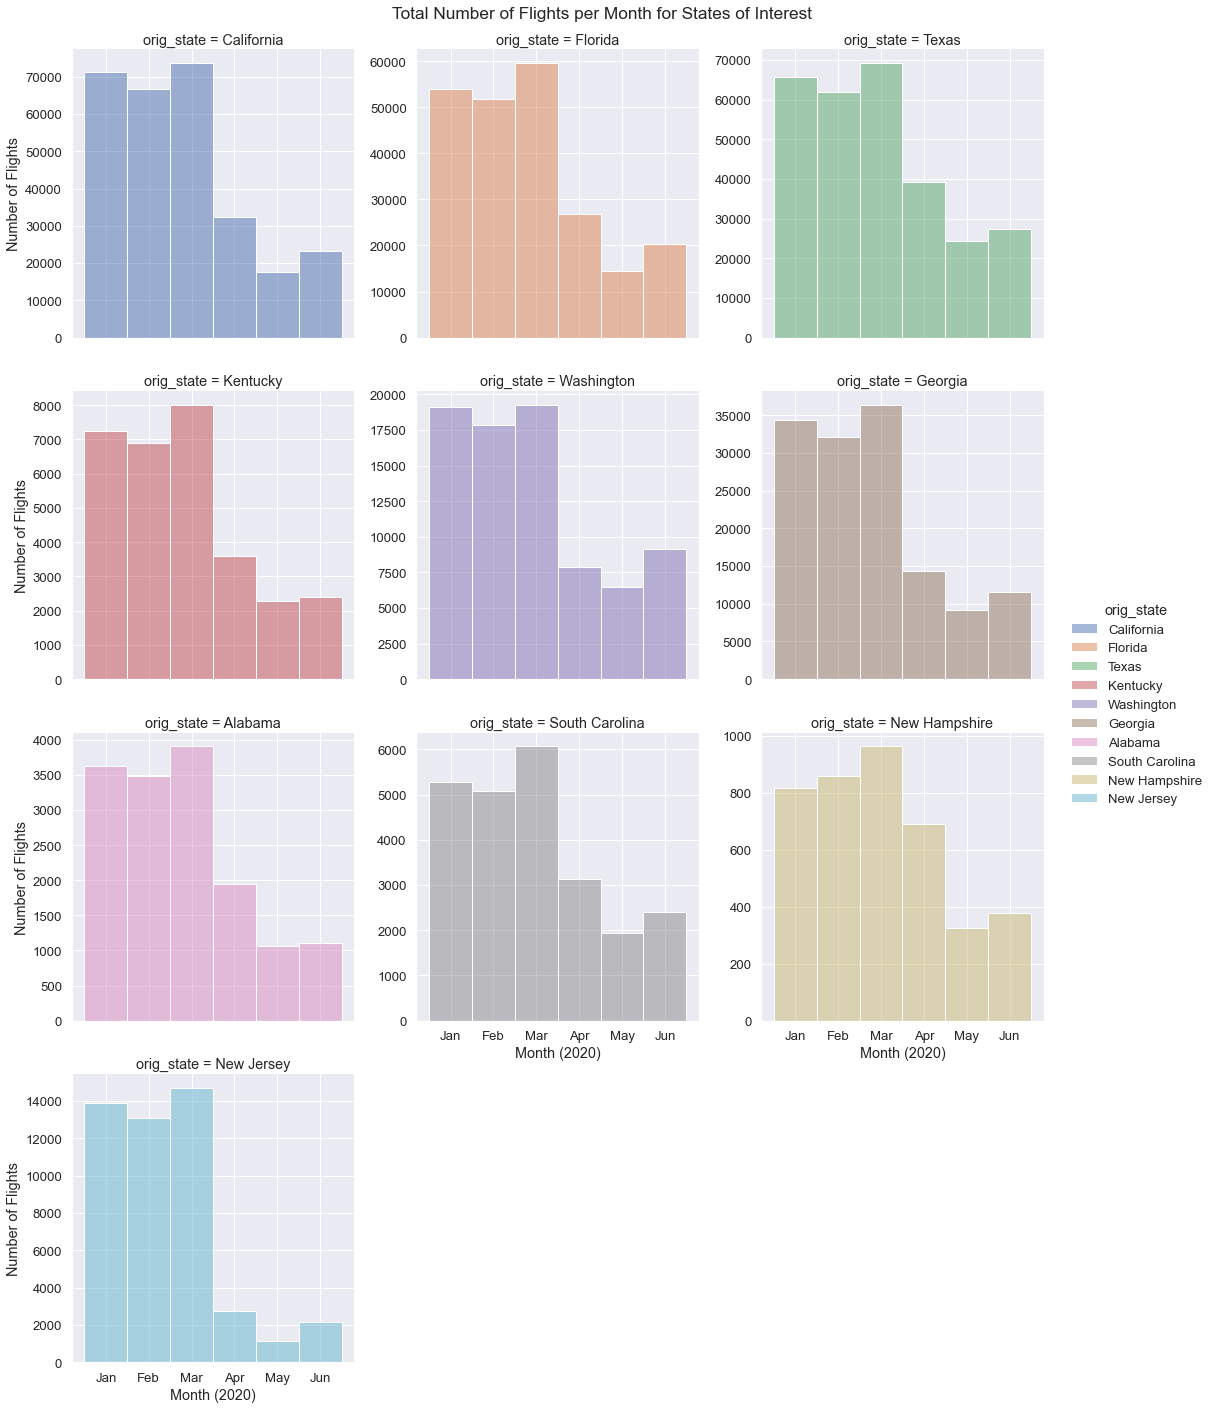

In [9]:
ax = sns.displot(data=flights_orig_m, x="flight_month", hue="orig_state", col="orig_state", col_wrap=3, facet_kws=dict(sharey=False))
ax.fig.suptitle("Total Number of Flights per Month for States of Interest")
ax.fig.subplots_adjust(top=.95)
ax.set_axis_labels(x_var="Month (2020)", y_var="Number of Flights");

In the plot below, I've calculated the percentage of flights that were cancelled during and not during lockdown orders for each state. We can definitely see that a much higher percentage of total flights were cancelled if they were scheduled during lockdown.

In [10]:
cancelled_p = flights_orig_m.groupby(['orig_state', 'lockdown_flight']).agg({'cancelled': (lambda x: np.sum(x) / len(x))}).reset_index()
cancelled_p.head()

,orig_state,lockdown_flight,cancelled
0,Alabama,False,0.069484
1,Alabama,True,0.409662
2,California,False,0.014378
3,California,True,0.262353
4,Florida,False,0.069043


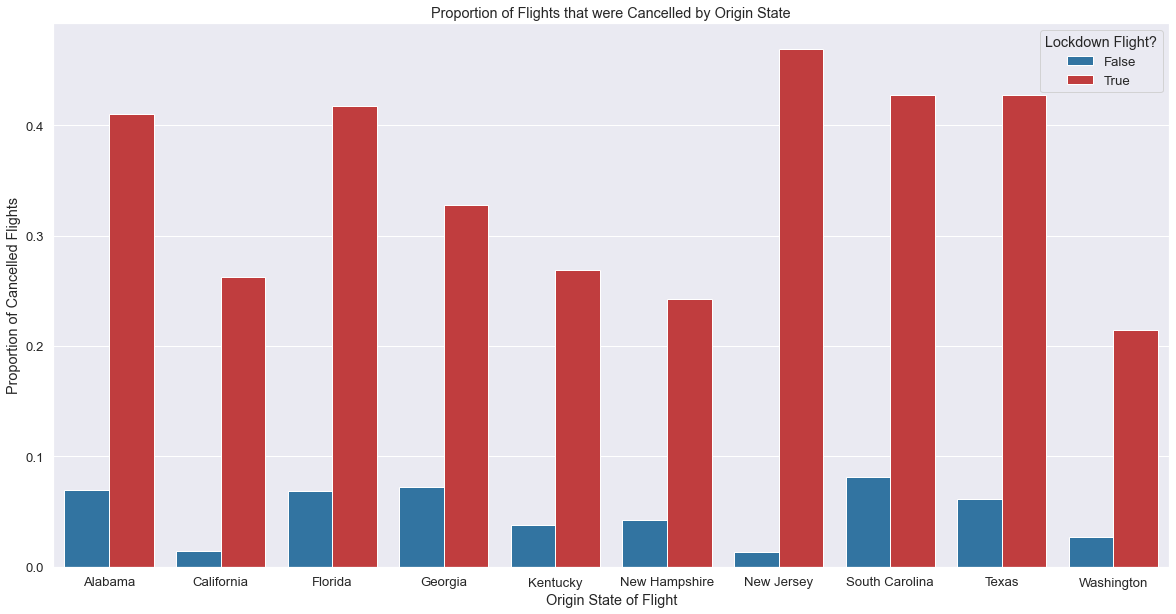

In [11]:
ax_2 = sns.barplot(data=cancelled_p, x="orig_state", y="cancelled", hue="lockdown_flight", palette=['tab:blue', 'tab:red'])
ax_2.set_title("Proportion of Flights that were Cancelled by Origin State")
ax_2.set(xlabel="Origin State of Flight", ylabel="Proportion of Cancelled Flights")
ax_2.legend(title="Lockdown Flight?");

In [12]:
cancelled_daily = flights_orig_m.groupby(["flight_date", "orig_state"]).sum().reset_index()
cancelled_daily = cancelled_daily[["flight_date", "orig_state", "cancelled"]]
cancelled_daily

,flight_date,orig_state,cancelled
0,2020-01-01,Alabama,0
1,2020-01-01,California,12
2,2020-01-01,Florida,5
3,2020-01-01,Georgia,0
4,2020-01-01,Kentucky,1
...,...,...,...
1815,2020-06-30,New Hampshire,0
1816,2020-06-30,New Jersey,0
1817,2020-06-30,South Carolina,0
1818,2020-06-30,Texas,0


Another visualization, this time a lineplot pitting the daily count of cancelled flights per state versus time. We can see a rise in cancellations in all states around the time of mid-March 2020 to the beginning of May 2020. This lines up with several states' lockdown dates, and adds more strength to the trend we've been observing thus far.

Something of note is that this plot does not explicitly label lockdown start and end dates, nor does it clarify whether the cancelled flights counted occurred during lockdown orders or not. But we can infer this connection from the previous plot and data analysis, I feel that this plot definitely contributes to the overall trend discovery.

A couple of states in the plot show much less noticable spikes in cancellations: New Hampshire and Alabama. This is likely a result of a universal y-axis scale and the lower populations of these states compared to the others in this study.

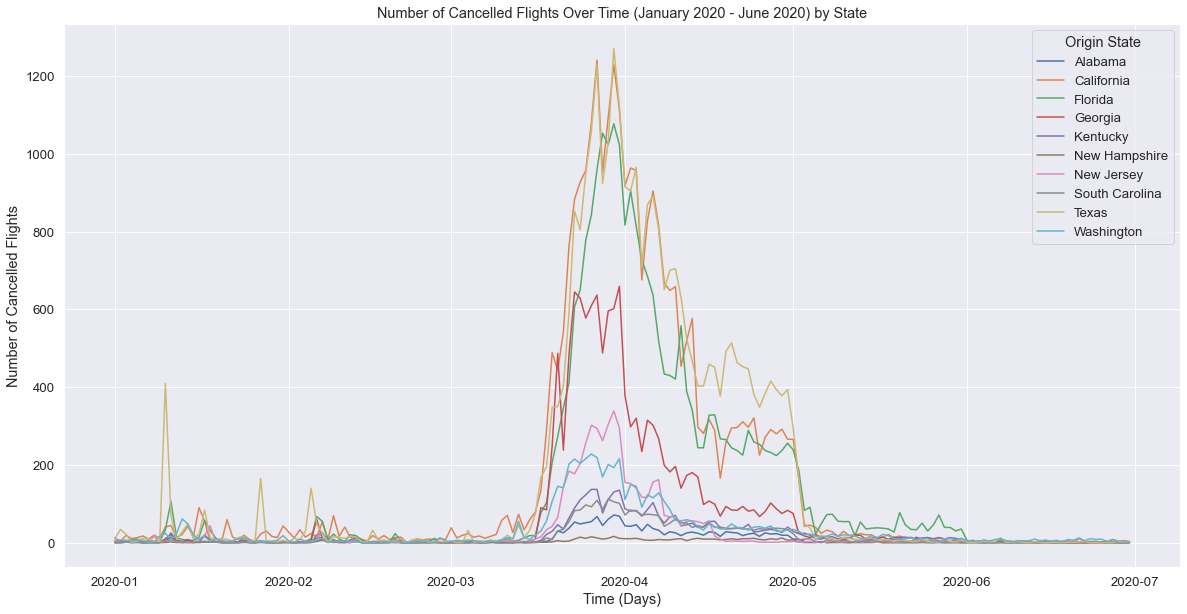

In [13]:
ax_3 = sns.lineplot(data=cancelled_daily, x="flight_date", y="cancelled", hue="orig_state")
ax_3.set_title("Number of Cancelled Flights Over Time (January 2020 - June 2020) by State")
ax_3.set(xlabel="Time (Days)", ylabel="Number of Cancelled Flights")
ax_3.legend(title="Origin State");

In [14]:
delay_avg_daily = flights_orig_m.groupby(["flight_date", "orig_state"]).mean().reset_index()
delay_avg_daily = delay_avg_daily[["flight_date", "orig_state", "dep_delay"]]
delay_avg_daily

,flight_date,orig_state,dep_delay
0,2020-01-01,Alabama,4.863636
1,2020-01-01,California,10.253605
2,2020-01-01,Florida,7.396238
3,2020-01-01,Georgia,3.108671
4,2020-01-01,Kentucky,7.710059
...,...,...,...
1815,2020-06-30,New Hampshire,6.166667
1816,2020-06-30,New Jersey,3.935065
1817,2020-06-30,South Carolina,6.753623
1818,2020-06-30,Texas,4.262487


The plot below is an attempt at plotting the average delay for a flight for each day over time. However, the plot is too noisy, and it does not appear that there could be meaningful correlations found in it so I've decided not to pursue this direction for now.

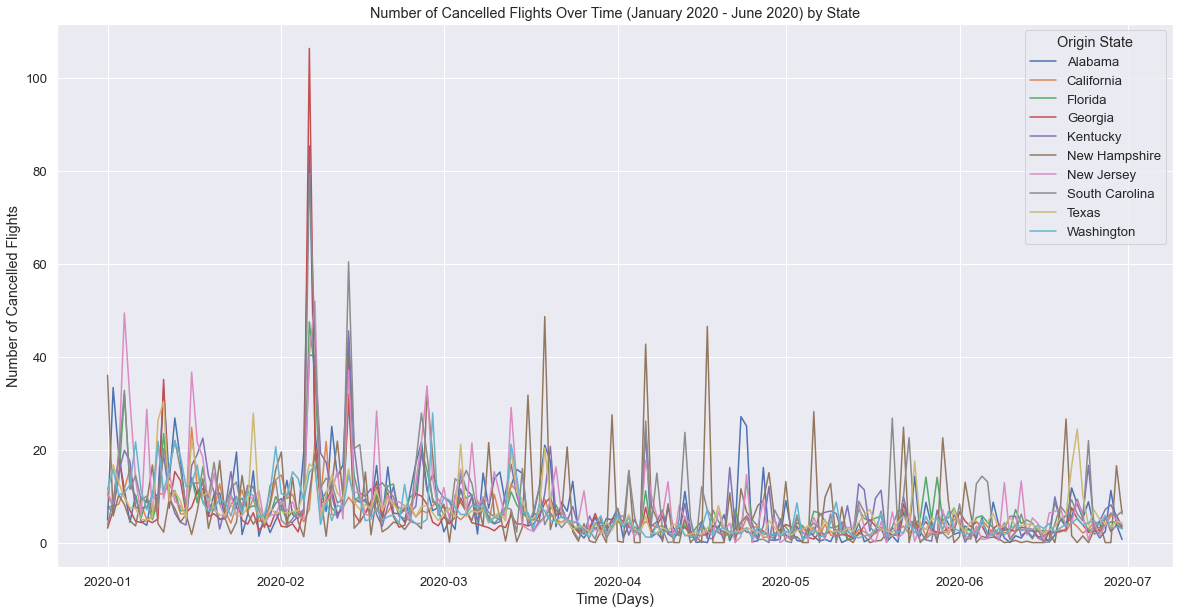

In [15]:
ax_4 = sns.lineplot(data=delay_avg_daily, x="flight_date", y="dep_delay", hue="orig_state")
ax_4.set_title("Number of Cancelled Flights Over Time (January 2020 - June 2020) by State")
ax_4.set(xlabel="Time (Days)", ylabel="Number of Cancelled Flights")
ax_4.legend(title="Origin State");

In [16]:
avg_distance_daily_c = flights_orig_m.groupby(["flight_date", "orig_state", "cancelled"]).mean().reset_index()
avg_distance_daily_c = avg_distance_daily_c[["flight_date", "orig_state", "cancelled", "distance"]]
avg_distance_daily_c

,flight_date,orig_state,cancelled,distance
0,2020-01-01,Alabama,False,488.704545
1,2020-01-01,California,False,989.237913
2,2020-01-01,California,True,746.750000
3,2020-01-01,Florida,False,950.723104
4,2020-01-01,Florida,True,879.600000
...,...,...,...,...
3160,2020-06-30,New Jersey,False,1068.961039
3161,2020-06-30,South Carolina,False,420.710145
3162,2020-06-30,Texas,False,747.589798
3163,2020-06-30,Washington,False,954.769716


This plot too does not appear to have any meaningful to contribute to the previously observed trends. The average distance for cancelled flights is too erratic and does not appear to be linked to lockdown dates in any state.

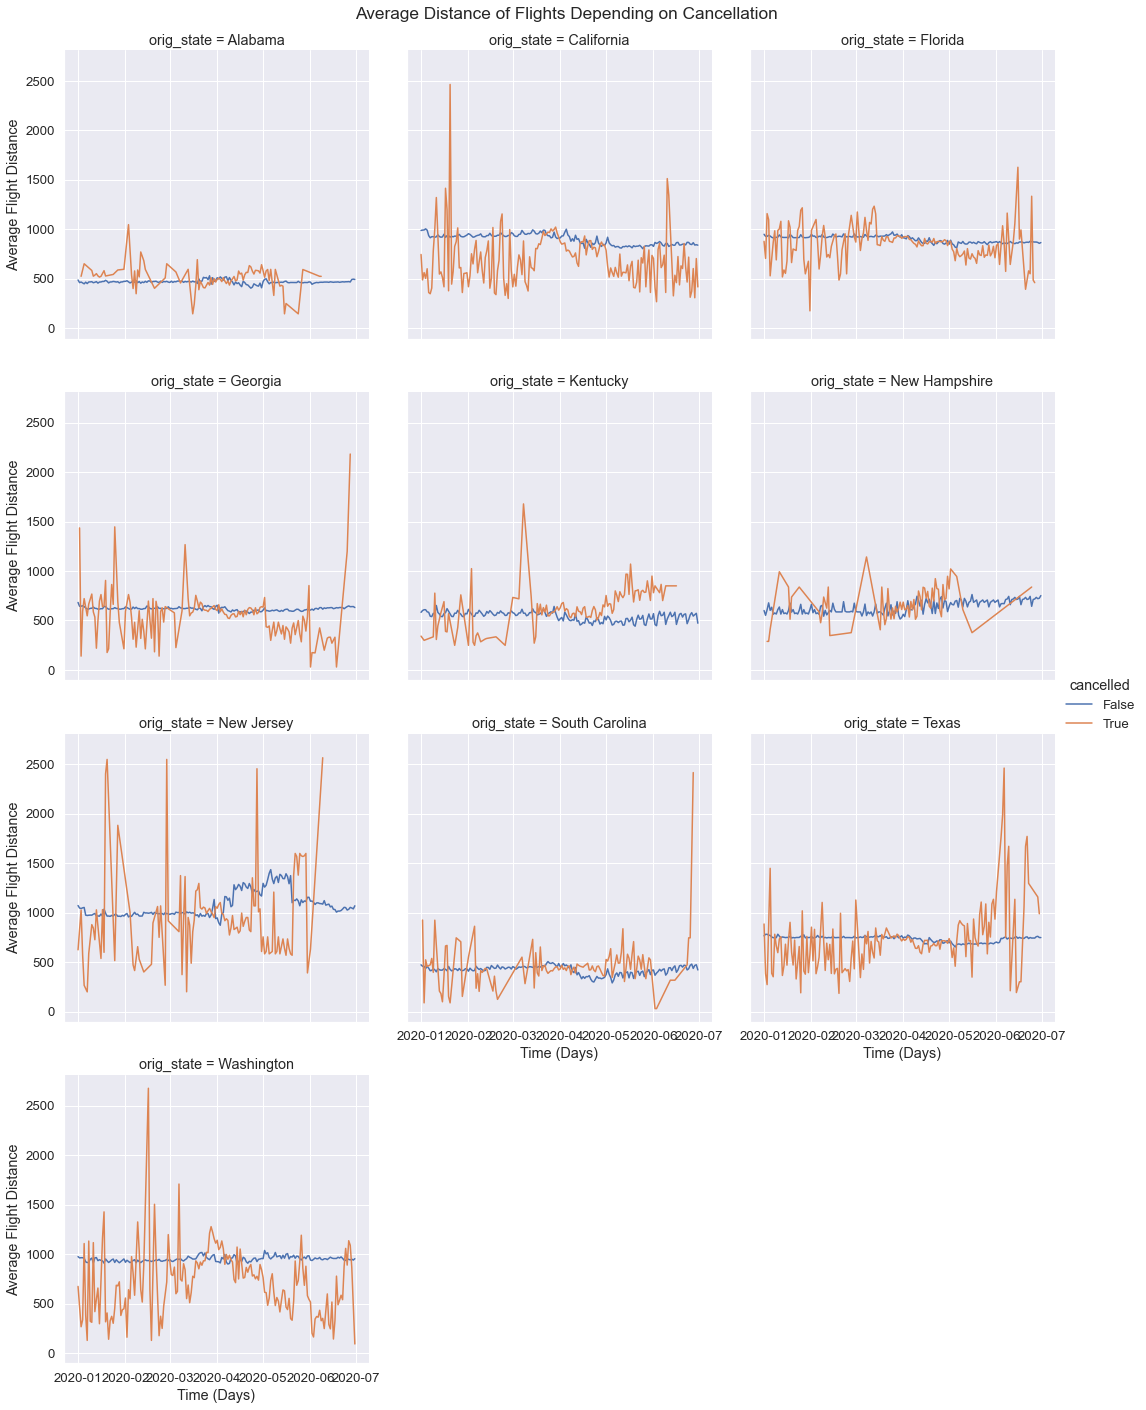

In [17]:
ax_5 = sns.relplot(data=avg_distance_daily_c, x="flight_date", y="distance", col="orig_state", col_wrap=3, hue="cancelled", kind="line")
ax_5.fig.suptitle("Average Distance of Flights Depending on Cancellation")
ax_5.fig.subplots_adjust(top=.95)
ax_5.set_axis_labels(x_var="Time (Days)", y_var="Average Flight Distance");

In [18]:
gas = pd.read_csv("gas_prices.csv")
gas.columns = gas.iloc[1].fillna('DROP')
gas = gas.drop([0, 1]).drop("DROP", axis=1)
gas

1,Date,Weekly California All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly California All Grades Reformulated Retail Gasoline Prices (Dollars per Gallon),Weekly California Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly California Regular Reformulated Retail Gasoline Prices (Dollars per Gallon),Weekly California Midgrade All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly California Midgrade Reformulated Retail Gasoline Prices (Dollars per Gallon),Weekly California Premium All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly California Premium Reformulated Retail Gasoline Prices (Dollars per Gallon),Weekly California No 2 Diesel Retail Prices (Dollars per Gallon),Weekly California No 2 Diesel Ultra Low Sulfur (0-15 ppm) Retail Prices (Dollars per Gallon)
2,"Jan 02, 1995",NaN,1.309,NaN,1.264,NaN,1.368,NaN,1.464,NaN,NaN
3,"Jan 09, 1995",NaN,1.312,NaN,1.267,NaN,1.37,NaN,1.467,NaN,NaN
4,"Jan 16, 1995",NaN,1.313,NaN,1.268,NaN,1.374,NaN,1.467,NaN,NaN
5,"Jan 23, 1995",NaN,1.302,NaN,1.257,NaN,1.369,NaN,1.454,NaN,NaN
6,"Jan 30, 1995",NaN,1.298,NaN,1.254,NaN,1.363,NaN,1.444,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1455,"Nov 07, 2022",5.333,5.333,5.228,5.228,5.542,5.542,5.635,5.635,6.191,6.191
1456,"Nov 14, 2022",5.312,5.312,5.21,5.21,5.526,5.526,5.603,5.603,6.18,6.18
1457,"Nov 21, 2022",5.138,5.138,5.034,5.034,5.352,5.352,5.428,5.428,6.105,6.105
1458,"Nov 28, 2022",4.909,4.909,4.813,4.813,5.127,5.127,5.169,5.169,6.006,6.006


In [19]:
gas = gas.rename(columns={"Date": "date",
                          "Weekly California All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)": "gas_all_grades",
                          "Weekly California Regular All Formulations Retail Gasoline Prices  (Dollars per Gallon)": "regular",
                          "Weekly California Midgrade All Formulations Retail Gasoline Prices  (Dollars per Gallon)": "midgrade",
                          "Weekly California Premium All Formulations Retail Gasoline Prices  (Dollars per Gallon)": "premium",
                          "Weekly California No 2 Diesel Retail Prices  (Dollars per Gallon)": "diesel"})

gas_c = gas[["date", "gas_all_grades", "regular", "midgrade", "premium", "diesel"]]

gas_c["date"] = pd.to_datetime(gas["date"], format="%b %d, %Y")
date_range = (gas_c["date"] > "2020-1-1") & (gas_c["date"] <= "2021-1-1")
gas_c = gas_c.loc[date_range]

gas_c["gas_all_grades"] = gas_c["gas_all_grades"].astype(float)
gas_c["regular"] = gas_c["regular"].astype(float)
gas_c["midgrade"] = gas_c["midgrade"].astype(float)
gas_c["premium"] = gas_c["premium"].astype(float)
gas_c["diesel"] = gas_c["diesel"].astype(float)

gas_c.head()

1,date,gas_all_grades,regular,midgrade,premium,diesel
1307,2020-01-06,3.505,3.428,3.646,3.730,3.895
1308,2020-01-13,3.497,3.419,3.642,3.725,3.872
1309,2020-01-20,3.487,3.408,3.635,3.716,3.866
1310,2020-01-27,3.467,3.388,3.609,3.703,3.857
1311,2020-02-03,3.455,3.371,3.611,3.697,3.812


In [20]:
gas_m = gas_c.melt("date", var_name="gas_type", value_name="price")
gas_m

,date,gas_type,price
0,2020-01-06,gas_all_grades,3.505
1,2020-01-13,gas_all_grades,3.497
2,2020-01-20,gas_all_grades,3.487
3,2020-01-27,gas_all_grades,3.467
4,2020-02-03,gas_all_grades,3.455
...,...,...,...
255,2020-11-30,diesel,3.288
256,2020-12-07,diesel,3.311
257,2020-12-14,diesel,3.342
258,2020-12-21,diesel,3.370


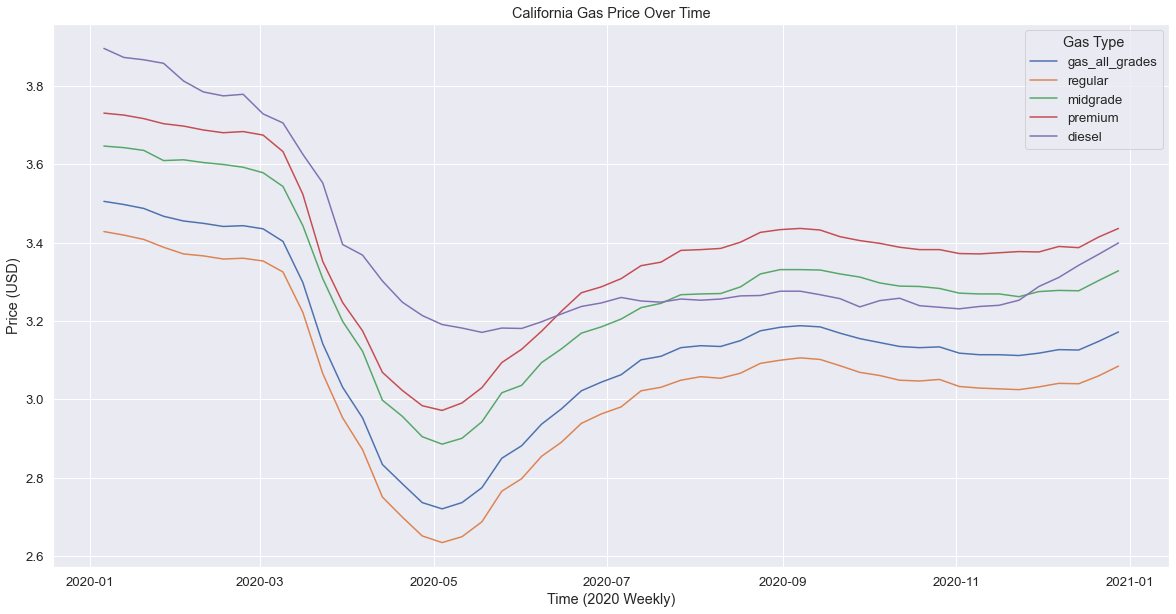

In [21]:
ax_6 = sns.lineplot(data=gas_m, x="date", y="price", hue="gas_type")
ax_6.set_title("California Gas Price Over Time")
ax_6.set(xlabel="Time (2020 Weekly)", ylabel="Price (USD)")
ax_6.legend(title="Gas Type");